# Taller 2 segundo corte

Un movimiento armónico con amortiguamiento viene dado por

\begin{equation}
\frac{d^{2}x}{dt^{2}} + \gamma\frac{dx}{dt} + \omega_{0}^{2}x = 0
\end{equation}

a) Encuentre el orden de esta ecuación diferencial y la función respectiva $F\left(t,x,\frac{dx}{dt}\right)$

#b) Resuelva por Runge-Kutta de cuarto orden para 2 casos: amortiguamiento débil y amortiguamiento crítico. Haga las 2 gráficas respectivas.

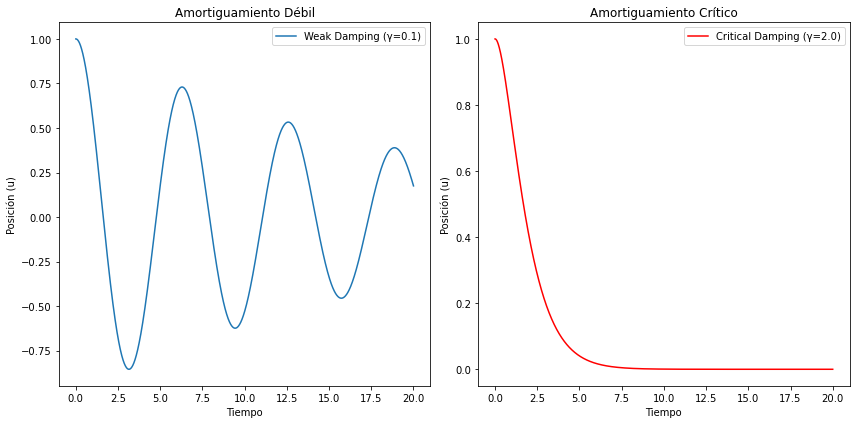

In [1]:

#Giseth Valentina Escalante Rojas
#Santiago Rodriguez Castellanos
#Valentina Sandoval Garcés


#A- La ecuación diferencial es de segunde orden debido a la derivada mayor de la función



#B, se muestra a continuación

import numpy as np
import matplotlib.pyplot as plt

def f(t, u, v, gamma, omega_0):
    du_dt = v
    dv_dt = -gamma * v - omega_0**2 * u
    return du_dt, dv_dt

def runge_kutta(h, T, u0, v0, gamma, omega_0):
    num_steps = int(T/h)
    t_values = np.zeros(num_steps + 1)
    u_values = np.zeros(num_steps + 1)
    v_values = np.zeros(num_steps + 1)

    t_values[0] = 0
    u_values[0] = u0
    v_values[0] = v0

    for i in range(num_steps):
        t = t_values[i]
        u = u_values[i]
        v = v_values[i]

        k1u, k1v = f(t, u, v, gamma, omega_0)
        k2u, k2v = f(t + h/2, u + h/2 * k1u, v + h/2 * k1v, gamma, omega_0)
        k3u, k3v = f(t + h/2, u + h/2 * k2u, v + h/2 * k2v, gamma, omega_0)
        k4u, k4v = f(t + h, u + h * k3u, v + h * k3v, gamma, omega_0)

        t_values[i+1] = t + h
        u_values[i+1] = u + h/6 * (k1u + 2*k2u + 2*k3u + k4u)
        v_values[i+1] = v + h/6 * (k1v + 2*k2v + 2*k3v + k4v)

    return t_values, u_values

# Parámetros
h = 0.01
T = 20
u0 = 1.0
v0 = 0.0
omega_0 = 1.0

# Caso de amortiguamiento débil
gamma_weak = 0.1
t_values_weak, u_values_weak = runge_kutta(h, T, u0, v0, gamma_weak, omega_0)

# Caso de amortiguamiento crítico
gamma_critical = 2 * np.sqrt(omega_0**2)
t_values_critical, u_values_critical = runge_kutta(h, T, u0, v0, gamma_critical, omega_0)

# Gráficas
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(t_values_weak, u_values_weak, label=f'Weak Damping (γ={gamma_weak})')
plt.title('Amortiguamiento Débil')
plt.xlabel('Tiempo')
plt.ylabel('Posición (u)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t_values_critical, u_values_critical, label=f'Critical Damping (γ={gamma_critical})', color='red')
plt.title('Amortiguamiento Crítico')
plt.xlabel('Tiempo')
plt.ylabel('Posición (u)')
plt.legend()

plt.tight_layout()
plt.show()
